In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer
#from qiskit.visualization import(
#  plot_state_city,
#  plot_bloch_multivector,
#  plot_state_paulivec,
#  plot_state_hinton,
#  plot_state_qsphere)


In [2]:
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]

In [3]:
backend = least_busy(IBMQ.backends(simulator=False))
print("The least busy backend is " + backend.name())
simulator = Aer.get_backend('qasm_simulator')

The least busy backend is ibmqx2


In [4]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.cx(q[0], q[2])
qc.cx(q[0], q[3])
qc.cx(q[0], q[4])
qc.measure(q,c)

In [5]:
job_exp = execute(qc, backend=backend, shots=8192)
counts = job_exp.result().get_counts(qc)

In [6]:
print("\nTotal count for IBMQ",counts)


Total count for IBMQ {'10101': 349, '10100': 50, '10111': 420, '01000': 576, '10010': 74, '00000': 879, '11111': 438, '01010': 700, '01110': 409, '11101': 356, '01001': 32, '00111': 52, '00010': 1017, '11100': 39, '01101': 39, '11011': 300, '11000': 52, '00101': 45, '10110': 46, '01100': 380, '00100': 415, '10000': 74, '10011': 256, '11010': 57, '10001': 208, '11110': 44, '00011': 27, '00110': 498, '01011': 31, '00001': 31, '11001': 263, '01111': 35}


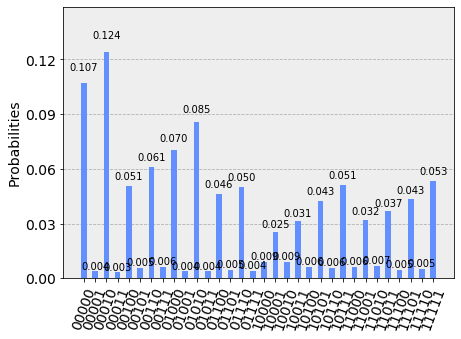

In [7]:
plot_histogram(counts)

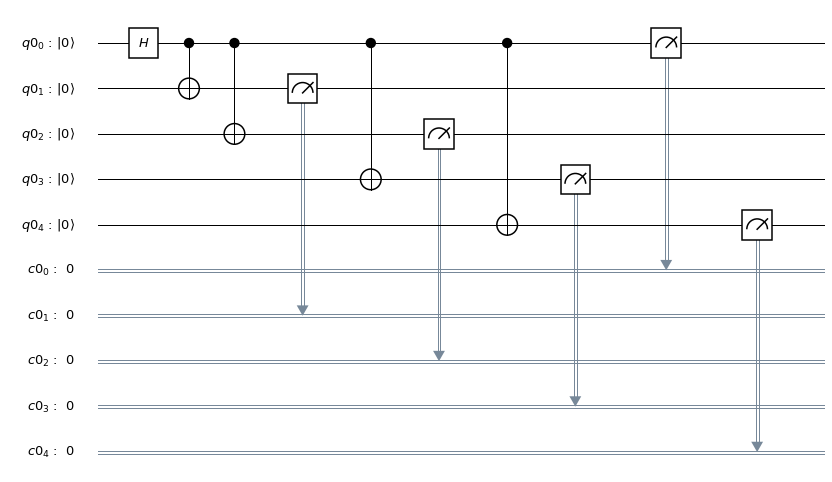

In [8]:
qc.draw(output='mpl')

In [9]:
job_sim = execute(qc, backend=simulator, shots=1024)
counts_sim = job_sim.result().get_counts(qc)

In [10]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'00000': 507, '11111': 517}


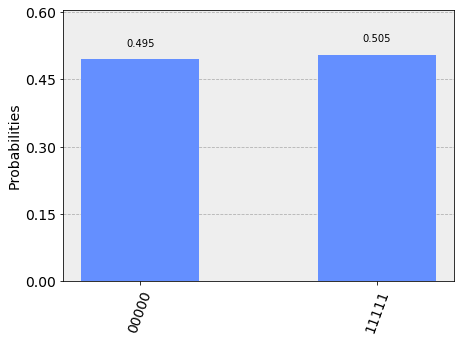

In [11]:
plot_histogram(counts_sim)

In [12]:
#pot_state_city(job_sim.result().get_statevector(qc))